# U.S. Medical Insurance Costs

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('fonts/Humor-Sans.ttf')
fm.fontManager.addfont('fonts/ComicNeue-Regular.ttf')
fm.fontManager.addfont('fonts/xkcd-script.ttf')
fm.fontManager.addfont('fonts/xkcd.otf')
import numpy as np
from scipy import stats
plt.xkcd()


In [78]:
# import CSV
insurance = pd.read_csv('insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Stuff to analyze:

* Average age of the patients
* Where the majority of the individuals are from
* Smoker cost vs non smoker cost
* Average cost for insurance
* How age affects insurance cost
* How BMI affects insurance cost
* How region affects insurance cost
* How num of children affects insurance cost

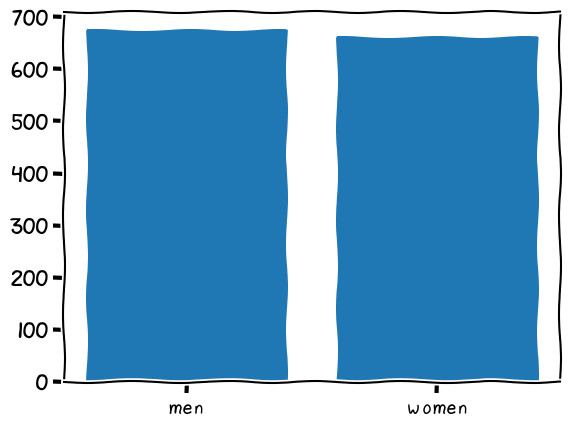

In [79]:
# num of male vs female
sex_count = insurance.sex.value_counts()
men = sex_count[0]
women = sex_count[1]


categories = ["men", "women"]
values = [men, women]
plt.bar(categories, values)
plt.show()


Text(0, 0.5, 'Count')

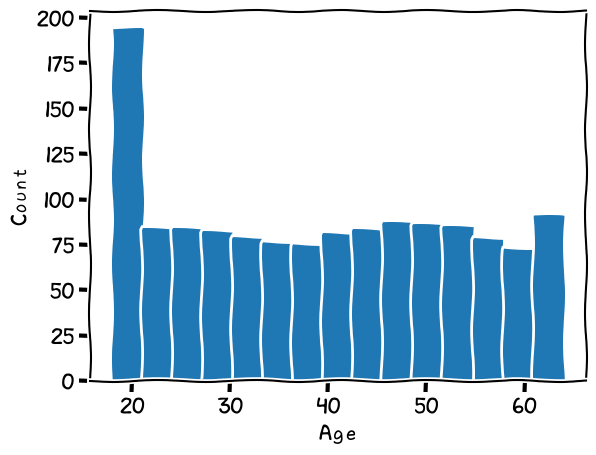

In [80]:
# histogram of ages
plt.hist(insurance.age, bins=15)
plt.xlabel("Age")
plt.ylabel("Count")

In [81]:
# average age
avg_age = np.mean(insurance.age)
print("Average age: " + str(avg_age))
# median age
med_age = np.median(insurance.age)
print("Median age: " + str(med_age))

Average age: 39.20702541106129
Median age: 39.0


# Where are the majority of people from?

(array([325.,   0.,   0., 364.,   0.,   0., 325.,   0.,   0., 324.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

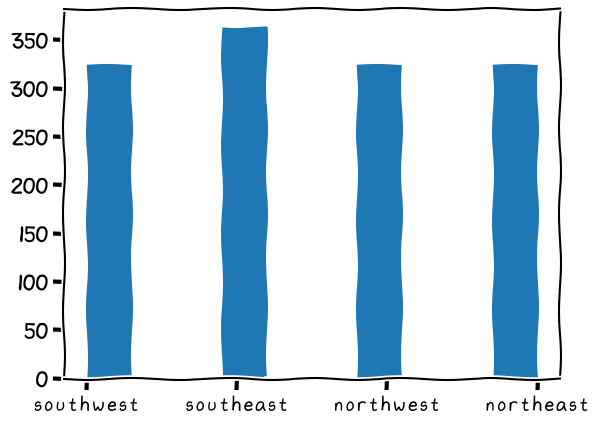

In [82]:
plt.hist(insurance.region)

# Smoker cost vs Non Smoker Cost

In [83]:
# the strategy here is to collect all smokers and their charges and then all non smokers and their charges

smoker_data = insurance[insurance['smoker'] == 'yes']
smoker_charges = smoker_data['charges']
smoker_charges_mean = smoker_charges.mean()

non_smoker_data = insurance[insurance['smoker'] == 'no']
non_smoker_charges = non_smoker_data['charges']
non_smoker_charges_mean = non_smoker_charges.mean()

print("Smoker charges avg: $", smoker_charges_mean)
print("Non Smoker charges avg: $", non_smoker_charges_mean)

print("Smoker pay, on average, $", round(smoker_charges_mean-non_smoker_charges_mean, 2), " more than non smokers")



Smoker charges avg: $ 32050.23183153284
Non Smoker charges avg: $ 8434.268297856204
Smoker pay, on average, $ 23615.96  more than non smokers


# Average Cost for Insurance

In [84]:
avg_insurance_cost = insurance['charges'].mean();
round(avg_insurance_cost, 2)

13270.42

# How Age affects insurance cost
1. Cost per age
2. Scatter Plot
3. Regression Analysis

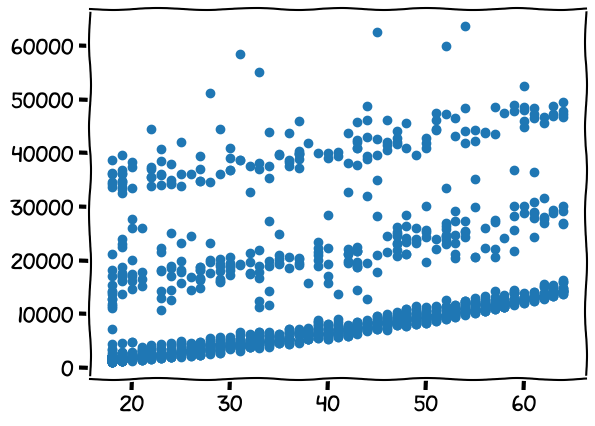

In [85]:
# scatter plot
plt.scatter(insurance['age'], insurance['charges'])

plt.show()



Loss:  5382491.868326372
Margin of error: +/- $ 2344.57


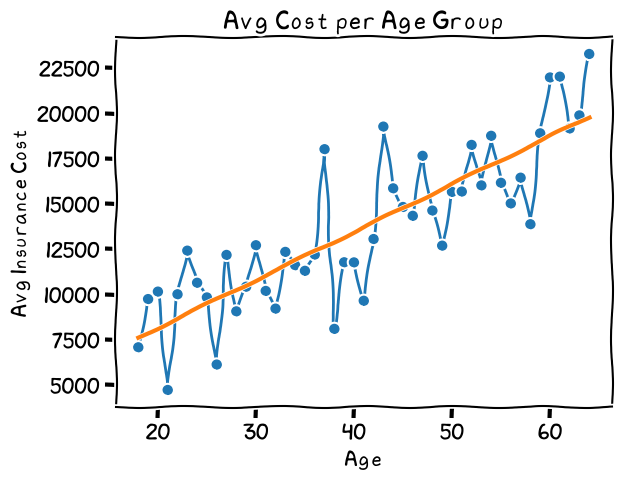

In [103]:
# cost per age
average_cost_per_age = insurance.groupby('age')['charges'].mean()

# manual regression line
x = average_cost_per_age.index
y = average_cost_per_age
age_m = np.mean(average_cost_per_age.index)
cost_m = np.mean(average_cost_per_age)
syx = np.mean((y-cost_m) * (x - age_m))
sxx = np.mean((x-age_m) ** 2)
syy = np.mean((y-cost_m)**2)
beta1 = syx/sxx
beta0 = cost_m -beta1*age_m
ypred = beta1 * x + beta0

loss = y - ypred
mse = np.mean(loss**2)
std_error = np.sqrt(mse)
print("Loss: ", mse)

error = std_error * np.sqrt(1 + 1/len(x))
print("Margin of error: +/- $", round(error,2))

plt.plot(average_cost_per_age.index, average_cost_per_age, marker='o', linestyle='-')
plt.plot(x, ypred, '-', linewidth=3)
plt.xlabel('Age')
plt.ylabel('Avg Insurance Cost')
plt.title('Avg Cost per Age Group')
plt.grid(True)
plt.show()


# How BMI Affects Insurance Cost

<BarContainer object of 6 artists>

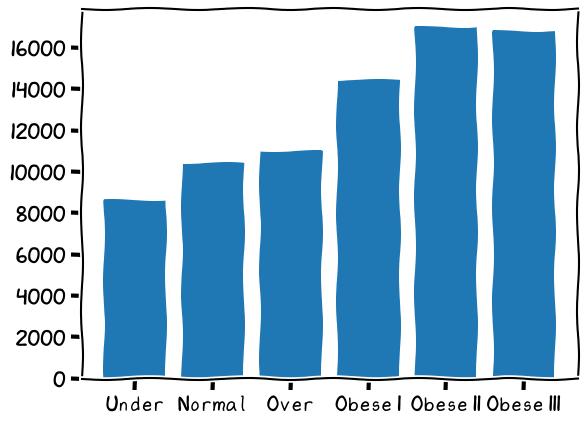

In [113]:
bin_edges = [0, 18.5, 25, 30, 35, 40, 50]
bin_labels = ['Under', 'Normal', 'Over', 'Obese I', 'Obese II', 'Obese III']
insurance['bmi_group'] = pd.cut(insurance['bmi'], bins=bin_edges, labels=bin_labels)
avg_cost_bmi = insurance.groupby('bmi_group')['charges'].mean()
plt.bar(avg_cost_bmi.index, avg_cost_bmi)